# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [151]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp
import join as jo

In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [154]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labeled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [5]:
df = pd.read_csv(data_dir+'lab/input.txt', sep='\t', encoding='utf-8')
df.columns

Index(['label', 'text', 'tag'], dtype='object')

## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

In [190]:
main.Main('tal', debug_iter_id=0)

Starting UpLabel >>>>	Project TAL
####################################
**** 	ITERATION # 0 		****
####################################

[INFO] Input Length -> 7766
[INFO] Label Summary: 
gracePeriodDate    47
None               28
damageDate         19
documentDate        7
Name: label, dtype: int64
[INFO] Post Duplicate/Missing Length -> 3805
[INFO] Not enough examples for label ('documentDate', 5)

[INFO] Estimating complexity using UNSUPERVISED approach.


C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:


	[INFO] Complexity Score -> 0.503
	[INFO] Applying model to data

[INFO] Applying split 
	[INFO] Number of splits -> 2 
	[INFO] Sample Fraction -> 49.7467%
	[INFO] Quality Size -> 7
	[INFO] Overlap Size -> 50
[INFO] Created split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_1.xlsx
gracePeriodDate    714
None               165
damageDate          98
Name: label, dtype: int64
[INFO] Created split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_2.xlsx
gracePeriodDate    716
None               165
damageDate          98
Name: label, dtype: int64


In [191]:
%%time

main.Main('tal', debug_iter_id=1)

Starting UpLabel >>>>	Project TAL
####################################
**** 	ITERATION # 1 		****
####################################

[INFO] Loading splits from iteration 0.
	[INFO] Calculating labeler score
	[INFO] Labeler 1 Score -> 0.84
	[INFO] Labeler 2 Score -> 0.84
[INFO] Input Length -> 3805
[INFO] Label Summary: 
gracePeriodDate    1414
None                341
damageDate          206
documentDate          5
Name: label, dtype: int64
[INFO] Post Duplicate/Missing Length -> 3805
[INFO] Not enough examples for label ('documentDate', 5)

[INFO] Estimating complexity using UNSUPERVISED approach.


C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:
C:\Users\makayser\AppData\Roaming\Python\Python36\site-packages\imblearn\pipeline.py:190: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if memory.cachedir is None:


	[INFO] Complexity Score -> 0.503
	[INFO] Applying model to data

[INFO] Applying split 
	[INFO] Number of splits -> 2 
	[INFO] Sample Fraction -> 49.6809%
	[INFO] Quality Size -> 196
	[INFO] Overlap Size -> 50
[INFO] Created split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_1.xlsx
None               756
gracePeriodDate    218
Name: label, dtype: int64
[INFO] Created split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_2.xlsx
None               756
gracePeriodDate    219
Name: label, dtype: int64
Wall time: 20.5 s


## Estimate Complexity


[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

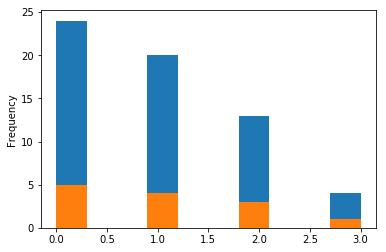

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

## Determine Split
Overlap

In [38]:
sp.calculate_split(3806, 0.73, 10)

(10, 0.27)

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

## Join

In [182]:
t1, t2, t3 = jo.load_splits(data_dir + 'tal/', 0)

16
	[INFO] Quality Score of Labeler 1 -> 0.0625
16
	[INFO] Quality Score of Labeler 2 -> 0.0


In [184]:
tc = jo.join_splits(t1, t2)

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  